В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
# імпорт бібліотек та завантаження даних

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

medical_df = pd.read_csv('https://raw.githubusercontent.com/roldugina/Machine_learning_course/main/medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']

## Лінійна регресія методом МНК

In [2]:
# підготовка даних для алгоритму

X = np.expand_dims(non_smoker_df.age.to_numpy(),axis = 1)
y = non_smoker_df.charges.array
X_mnk = np.c_[np.ones((X.shape[0],1)),X]
print(f'Розмірність масиву X_mnk: {X_mnk.shape}')
print(f'Масив X_mnk:\n{X_mnk}')

Розмірність масиву X_mnk: (1064, 2)
Масив X_mnk:
[[ 1. 18.]
 [ 1. 28.]
 [ 1. 33.]
 ...
 [ 1. 18.]
 [ 1. 18.]
 [ 1. 21.]]


In [3]:
# розрахуємо стандартне відхилення таргету (будемо використовувати для оцінки результатів RMSE)

np.std(y)

5990.9645302876115

In [4]:
# функція розрахунку коефіцієнтів моделі методом МНК

def normal_equations(X,y):

  theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
  return theta

In [5]:
# функція виводу помилок моделі

def plot_errors(errors):

  plt.plot(errors,color = 'red',label= 'MSE Model Errors')
  plt.title('Comparison of Linear Regression Methods')
  plt.xlabel('Epoch')
  plt.ylabel('Error value')
  plt.legend()
  plt.grid(True)
  plt.show()

In [6]:
# розрахунок моделі

coef_mnk = normal_equations(X_mnk,y)
print(f'Коефіцієнти регресії методом МНК: {coef_mnk}')
predictions_mnk = np.dot(X_mnk,coef_mnk)
rmse_mnk = mean_squared_error(y,predictions_mnk,squared = False)
print(f'RMSE для регресії, яка розрахована методом МНК: {rmse_mnk}')

Коефіцієнти регресії методом МНК: [-2091.42055657   267.24891283]
RMSE для регресії, яка розрахована методом МНК: 4662.505766636395


## Обчислення регресії методом Full-Batch градієнтного спуска

In [7]:
# функція розрахунку коефіцієнтів методом FBGD

def full_batch_gradient_descent(X, y, m=0, b=0, lr=0.1, epochs=100):
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors


In [8]:
# розрахунок моделі вар.1

m1, b1, errors1 = full_batch_gradient_descent(X,y,lr = 0.1, epochs = 1000)
print(f'Коефіцієнти регресії методом FBGD: {b1}, {m1}')
print(errors1[len(errors1)-1])

<ipython-input-7-bde0930818ee>:9: RuntimeWarning: overflow encountered in scalar add
  errors.append(sum(error**2))
<ipython-input-7-bde0930818ee>:12: RuntimeWarning: invalid value encountered in scalar subtract
  m = m - lr * m_gradient


Коефіцієнти регресії методом FBGD: -inf, nan
nan


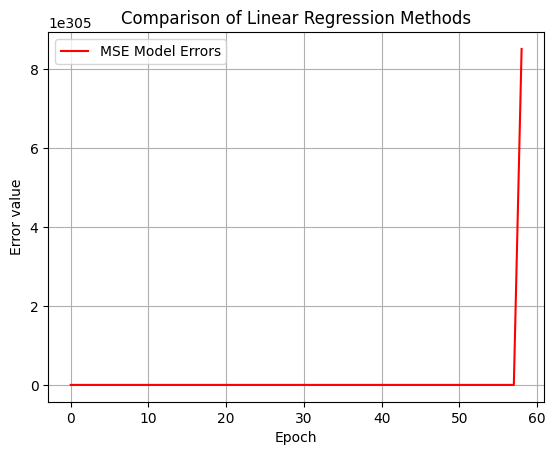

In [9]:
plot_errors(errors1)

Алгоритм "розходиться", тобто замість зменшення, функція втрат зростає:
* отримали помилку `overflow`;
* модель не може розрахувати коефіцієнти;
* зростання функції втрат можемо побачити на графіку.

Одна з можливих причин - завеликий шаг моделі.
Спробуємо з меншим шагом.

In [10]:
# розрахунок моделі вар.2

m2, b2, errors2 = full_batch_gradient_descent(X,y,lr = 0.001, epochs = 1000)
print(f'Коефіцієнти регресії методом FBGD: {b2}, {m2}')
print(errors2[len(errors2)-1])

<ipython-input-7-bde0930818ee>:9: RuntimeWarning: overflow encountered in scalar add
  errors.append(sum(error**2))
<ipython-input-7-bde0930818ee>:12: RuntimeWarning: invalid value encountered in scalar subtract
  m = m - lr * m_gradient


Коефіцієнти регресії методом FBGD: inf, nan
nan


З шагом 0.001 модель теж розходиться.

In [11]:
# розрахунок моделі вар.3

m3, b3, errors3 = full_batch_gradient_descent(X,y, m=200, b=-1000,lr = 0.0005, epochs = 3000)
print(f'Коефіцієнти регресії методом FBGD: {b3}, {m3}')
print(errors3[len(errors3)-1])

Коефіцієнти регресії методом FBGD: -1313.637432782397, 249.7366692933547
23203179883.790993


Експериментальним шляхом підібрала початкові параметри, шаг моделі та кількість ітерацій, при яких модель сходиться та видає результат, близький до МНК (варіант 3).

In [12]:
predictions_fbgd = m3*X[:,0]+b3
rmse_fbgd = mean_squared_error(y,predictions_fbgd,squared = False)
print(f'RMSE для регресії, яка розрахована методом FBGD: {rmse_fbgd}')

RMSE для регресії, яка розрахована методом FBGD: 4669.8484313778035


## Обчислення регресії з використанням Sklearn

In [13]:
lin_reg = LinearRegression()

In [14]:
lin_reg.fit(X,y)

LinearRegression()

In [15]:
print(f'Коефіцієнти регресії методом sklearn: {lin_reg.intercept_, lin_reg.coef_}')

Коефіцієнти регресії методом sklearn: (-2091.4205565650864, array([267.24891283]))


In [16]:
predictions_sklearn = lin_reg.predict(X)

In [17]:
rmse_sklearn = mean_squared_error(y,predictions_sklearn,squared = False)
print(f'RMSE для регресії, яка розрахована методом sklearn: {rmse_sklearn}')

RMSE для регресії, яка розрахована методом sklearn: 4662.505766636395


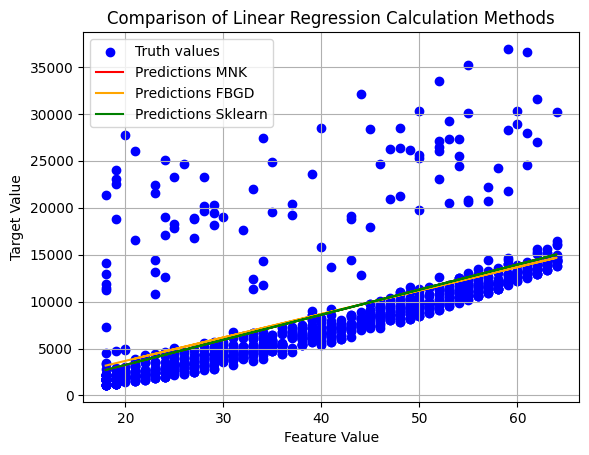

In [18]:
plt.scatter(X[:,0],y,color = 'blue',label = 'Truth values')
plt.plot(X[:,0],predictions_mnk,color = 'red',label= 'Predictions MNK')
plt.plot(X[:,0],predictions_fbgd,color = 'orange',label= 'Predictions FBGD')
plt.plot(X[:, 0], predictions_sklearn, color='green', label='Predictions Sklearn')
plt.title('Comparison of Linear Regression Calculation Methods')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()




In [19]:
print(f'RMSE для регресії, яка розрахована методом МНК: {rmse_mnk}')
print(f'RMSE для регресії, яка розрахована методом FBGD: {rmse_fbgd}')
print(f'RMSE для регресії, яка розрахована методом sklearn: {rmse_sklearn}')


RMSE для регресії, яка розрахована методом МНК: 4662.505766636395
RMSE для регресії, яка розрахована методом FBGD: 4669.8484313778035
RMSE для регресії, яка розрахована методом sklearn: 4662.505766636395


**Висновки**

Експериментальним шляхом підібрала початкові параметри, шаг моделі та кількість ітерацій, при яких модель FBGD видає результат, близький до МНК:

* RMSE методом градієнтного спуску 4 669.848431
* RMSE методом МНК 4 662.505767

Обидва показники менше стандартного відхилення цільової змінної (11 520.466706), тобто модель досить гарно описує цільову змінну.

Коефіцієнти регресії методом МНК (b,m): -2091.42055657   267.24891283
Коефіцієнти регресії методом FBGD (b,m): -1313.637432782397, 249.7366692933547




 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [20]:
smoker_df = medical_df[medical_df.smoker == 'yes']
X = np.expand_dims(smoker_df.age,axis = 1)
y = smoker_df.charges.array

In [21]:
lin_reg_smoker = LinearRegression()

In [22]:
lin_reg_smoker.fit(X,y)

LinearRegression()

In [23]:
predictions_smoker = lin_reg_smoker.predict(X)
rmse_smoker = mean_squared_error(y, predictions_smoker, squared = False)
print(f'RMSE моделі розрахунку страхових виплат для курців: {rmse_smoker}')
print(f'Коефіцієнти регресії моделі розрахунку страхових виплат для курців методом sklearn: {lin_reg_smoker.intercept_, lin_reg_smoker.coef_}')

RMSE моделі розрахунку страхових виплат для курців: 10711.00334810241
Коефіцієнти регресії моделі розрахунку страхових виплат для курців методом sklearn: (20294.128126915966, array([305.23760211]))


In [24]:
# розрахуємо стандартне відхилення таргету (будемо використовувати для оцінки результатів RMSE)

y.std()

11541.547175589121

**Показник RMSE дуже близький до стандартного відхилення цільової змінної, що означає, що модель не дуже гарно описує таргет.**

Візуалізуємо результати:

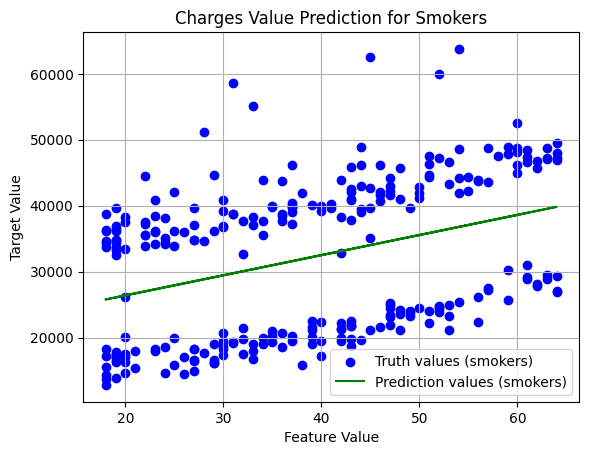

In [25]:
plt.scatter(X[:,0],y,color = 'blue',label = 'Truth values (smokers)')
plt.plot(X[:, 0], predictions_smoker, color='green', label='Prediction values (smokers)')
plt.title('Charges Value Prediction for Smokers')
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.show()

**Висновки**

* Показник RMSE=10 771.003348, дуже близький до стандартного відхилення цільової змінної (11 541.547176), що означає, що модель не дуже гарно описує таргет.
* на графіку ми бачимо, що модель лінійної регресії знайшла загальний тренд, в якому змінюється цільова змінна. При цьому цільова змінна ділиться на 2 великих групи даних, і лінійна регресія не може добре передбачає значення, близьке до середнього між ними, але не може добре спрогнозувати значення в кожній з груп даних.
* для поліпшення результату треба дослідити, за яким саме критерієм дані формують ці групи, і побудувати модель для кожної з них окремо.